In [141]:
# Dependencies
import csv
from random import uniform
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from config import api_key

In [143]:
lat_list=[]
long_list=[]
def latpoint():
   return uniform(-90, 90)

lat_points = (latpoint() for x in range(500))
for point in lat_points:
   lat_list.append(point)

def longpoint():
   return uniform(-180, 180)

long_points = (longpoint() for y in range(500))
for point in long_points:
   long_list.append(point)

In [144]:
coordinates=[]
i=0
for i in range(0,(len(lat_list))):
    coord_pair = (lat_list[i],long_list[i])
    coordinates.append(coord_pair)
    i=i+1

[(-4.474539326743056, 168.63974888490918), (9.92719136599166, -126.79121886555818), (27.744881927255847, -104.68097862119417), (76.04059345383729, 54.62702804390236), (-54.26510849696128, -106.83971164206667), (-76.72985732063276, 128.96107505639316), (87.08733777669352, -35.9213367507067), (-27.51496198699102, 87.21911055274273), (-12.682473996057468, 103.6518160685115), (30.03599075082738, -82.0190499913628), (58.825833071213964, -75.3662412843623), (-39.2278913122438, -49.1641569162083), (-40.38845643699856, -27.759702178888205), (23.28035113859903, 174.74240316426904), (-11.007194904830044, 51.44322422269289), (-61.02579228280323, -72.01008232127417), (-42.51534652222392, 127.13217992422659), (-17.506670795939613, 131.02247558528944), (26.51723211357418, 43.37230801985734), (72.14115565842471, 119.43294399147538), (77.04676387604223, -100.8947321048226), (-68.08651663261165, 166.89276157929356), (-28.462760798389155, 17.726341668887613), (29.88678244381481, -62.68361921969286), (44

In [151]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
city_name=[]   
city_ctry=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_name.append(name)
    city_ctry.append(country_code)
print(city_name[499])

agropoli


In [146]:
api_key="e5d8384ce4cc890a52260c5a13589c0a"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [171]:
cities = city_name
# set up lists to hold reponse info
temps = []
humid = []
cloudy = []
winds = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        temps.append(response['main']['temp'])
    except:
        temps.append('NF')
    try:
        humid.append(response['main']['humidity'])
    except:
        humid.append('NF')
    try:
        cloudy.append(response['clouds']['all'])
    except:
        cloudy.append('NF')
    try:
        winds.append(response['wind']['speed'])
    except:
        winds.append('NF')

In [187]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "country":city_ctry,
    "lat": lat_list,
    "long":long_list,
    "temp": temps,
    "humidity":humid,
    "cloudiness":cloudy,
    "wind speed":winds
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherData500.csv')
weather_data.head()

,city,country,lat,long,temp,humidity,cloudiness,wind speed
0,lata,sb,-4.474539,168.639749,37.02,28,0,10.2
1,cabo san lucas,mx,9.927191,-126.791219,76.48,78,40,6.93
2,camargo,mx,27.744882,-104.680979,69.21,55,100,5.3
3,belushya guba,ru,76.040593,54.627028,NF,NF,NF,NF
4,castro,cl,-54.265108,-106.839712,45.23,94,98,7.63


In [188]:
weather_data2=weather_data[weather_data.temp != 'NF']
weather_data2.to_csv('Weather500_minus_NotFound.csv')

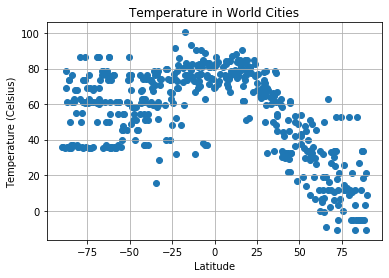

In [182]:
# Build a scatter plot for each data type
plt.scatter(weather_data2["lat"], weather_data2["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

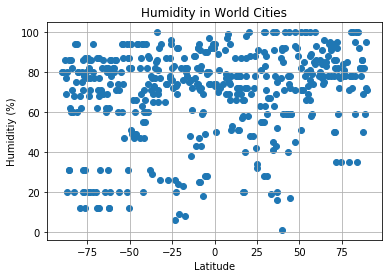

In [183]:
# Build a scatter plot for each data type
plt.scatter(weather_data2["lat"], weather_data2["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humiditiy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

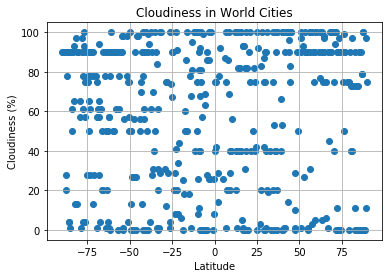

In [185]:
# Build a scatter plot for each data type
plt.scatter(weather_data2["lat"], weather_data2["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

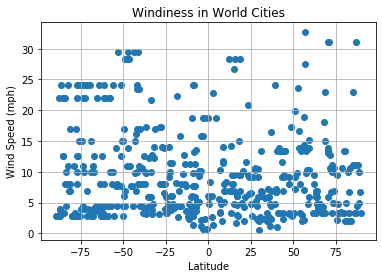

In [186]:
# Build a scatter plot for each data type
plt.scatter(weather_data2["lat"], weather_data2["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Windiness in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()